# Historical S&P 500 analysis

## Import and combine data sets

In [1]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# LOAD DATA SETS 

# S&P 500 daily closing value 1986 - 2018
sp_old_raw = pd.read_csv('./data/sp500_to_29jun2018.csv')

# S&P 500 daily closing value
sp_new_raw_temp1 = pd.read_csv('./data/sp500_to_9apr2020.csv')
sp_new_raw_temp2 = sp_new_raw_temp1[['Effective date ', 'S&P 500']]
sp_new_raw = sp_new_raw_temp2[sp_new_raw_temp2['Effective date '].notna()]

In [3]:
# recast date as datetime
sp_old = pd.DataFrame({'date': pd.to_datetime(sp_old_raw['date']),
                       'close': sp_old_raw['close']})

sp_new = pd.DataFrame({'date': pd.to_datetime(sp_new_raw['Effective date ']),
                       'close': sp_new_raw['S&P 500']})

In [4]:
# combine old and new data sets
sp = pd.concat([sp_old, sp_new]).drop_duplicates().reset_index(drop=True)
sp

,date,close
0,1986-01-02,209.59
1,1986-01-03,210.88
2,1986-01-06,210.65
3,1986-01-07,213.80
4,1986-01-08,207.97
...,...,...
8634,2020-04-03,2488.65
8635,2020-04-06,2663.68
8636,2020-04-07,2659.41
8637,2020-04-08,2749.98


In [5]:
# # save combined data set
# sp.to_csv('./data/sp500_all.csv', index=False)

## Load combined S&P 500 data set

In [6]:
# # LOAD DATA SETS 

# # S&P 500 daily closing value Jan 1986 - Apr 2020
# sp = pd.read_csv('./data/sp500_all.csv')
sp[::1000]

,date,close
0,1986-01-02,209.59
1000,1989-12-14,350.93
2000,1993-11-29,461.90
3000,1997-11-11,923.78
4000,2001-11-05,1102.84
5000,2005-10-25,1196.54
6000,2009-10-15,1096.56
7000,2013-10-07,1676.12
8000,2017-09-26,2496.84


## Visualize S&P 500 data

/Users/michaelboles/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


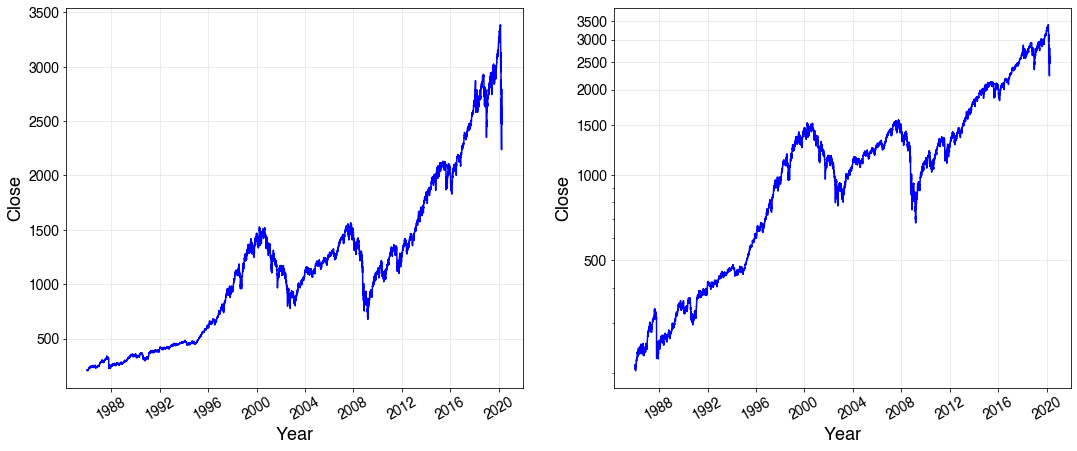

In [7]:
### PLOT S&P 500 data

# linear scale
fig, axes = plt.subplots(1, 2, figsize = (18,7))
x = sp['date']
y = sp['close']
axes[0].plot(x, y, 'blue')
axes[0].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# log scale
import matplotlib
axes[1].plot(x, y, 'blue')
axes[1].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_yscale('log')
axes[1].set_yticks(np.arange(500,3501,500))
axes[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# set axis tick label properties
plt.setp(axes[0].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[0].get_yticklabels(), fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_yticklabels(), fontsize=14, fontname = 'Helvetica')

# turn grid on
axes[0].grid(color=(.9, .9, .9))
axes[1].grid(color=(.9, .9, .9))

figure_name = './images/sp_lin_log.png'

plt.savefig(figure_name, dpi = 250)

plt.show()

In [8]:
sp_diffs = pd.DataFrame({'date': sp['date'],
                         'close': sp['close'],
                         'daily change': sp.diff()['close'],
                         'daily change pct': round(100*sp.diff()['close']/sp['close'],3),
                         'high to date': sp['close'].cummax(),
                         'off from high': round(100*(sp['close'] - sp['close'].cummax()) / sp['close'].cummax(),3)})

## Display daily changes

In [27]:
average

0.02307247047927761

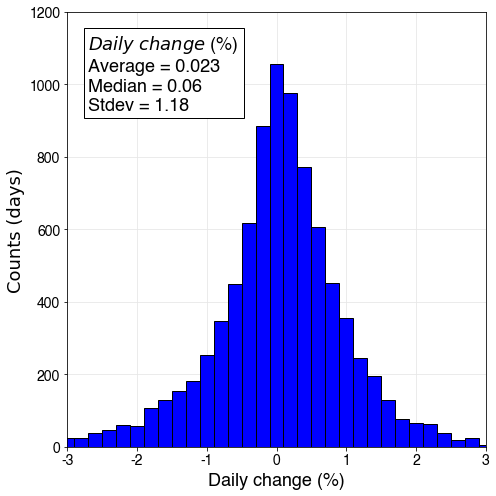

In [26]:
### PLOT HISTOGRAM OF DAILY CHANGES ###

# create textbox
data = sp_diffs['daily change pct'][1:]
average = np.nanmean(data)
median = np.nanmedian(data)
stdev = np.std(data)
props = dict(facecolor='white', edgecolor='none', alpha=0.67)
textbox = '$Daily$ $change$ (%%) \nAverage = %s \nMedian = %s \nStdev = %s' % (round(average,3), round(median,3), round(stdev,3))

from plotfunctions_1 import plot_hist
binwidth = 0.2
xmin = -3; xmax = 3
ymin = 0; ymax = 1200
xlabel = 'Daily change (%)'; ylabel = 'Counts (days)'
figure_name = './images/daily_changes.png'
plot_hist(data, binwidth, textbox, props, xmin, xmax, ymin, ymax, xlabel, ylabel, figure_name)

In [10]:
# look at largest changes in either direction
big_drops = sp_diffs.sort_values('daily change pct')[:25]
big_gains = sp_diffs.sort_values('daily change pct', ascending=False)[:25]
# big_drops
# big_gains

In [11]:
# get daily changes (%) n-tiles
n = 5
change_quantiles = pd.DataFrame({'daily change': pd.qcut(sp_diffs['daily change pct'][1:], n).value_counts().sort_index().reset_index()['index'],
                             'counts': pd.qcut(sp_diffs['daily change pct'][1:], n).value_counts().sort_index().reset_index()['daily change pct']})
change_quantiles

,daily change,counts
0,"(-25.735000000000003, -0.611]",1730
1,"(-0.611, -0.105]",1726
2,"(-0.105, 0.227]",1727
3,"(0.227, 0.709]",1727
4,"(0.709, 10.378]",1728


## Histogram: number of days closing a given amount below record high

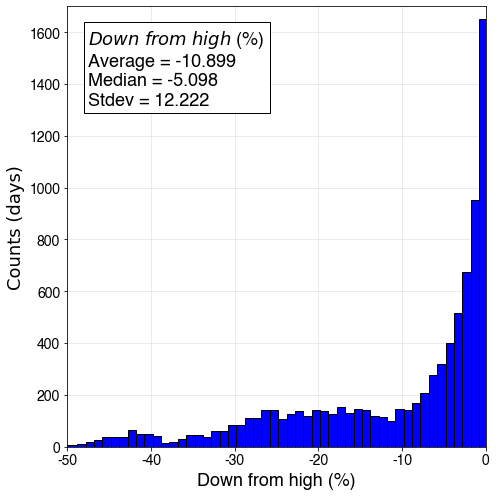

In [61]:
### PLOT HISTOGRAM OF PERCENT OFF HIGH ###

# create textbox
data = sp_diffs['off from high'][1:]
average = np.nanmean(data)
median = np.nanmedian(data)
stdev = np.std(data)
props = dict(facecolor='white', edgecolor='none', alpha=0.67)
textbox = '$Down$ $from$ $high$ (%%) \nAverage = %s \nMedian = %s \nStdev = %s' % (round(average,3), round(median,3), round(stdev,3))

from plotfunctions_1 import plot_hist
binwidth = 1
xmin = -50; xmax = 0
ymin = 0; ymax = 1700
xlabel = 'Down from high (%)'; ylabel = 'Counts (days)'
figure_name = './images/off_from_high.png'
plot_hist(data, binwidth, textbox, props, xmin, xmax, ymin, ymax, xlabel, ylabel, figure_name)

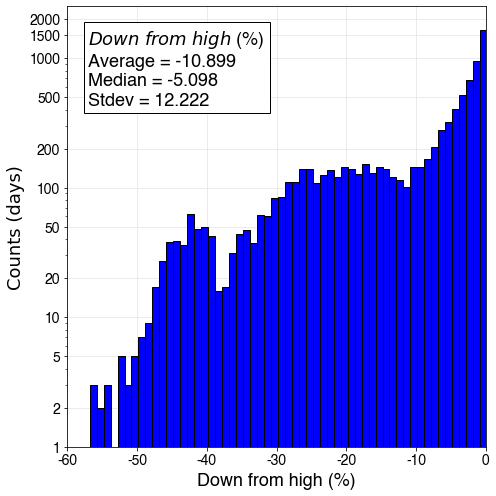

In [62]:
binwidth = 1
xmin = -60; xmax = 0
ymin = 0; ymax = 2500
yticks = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 1500, 2000]
xlabel = 'Down from high (%)'; ylabel = 'Counts (days)'

from plotfunctions_1 import plot_hist_log_y
binwidth = 1
xlabel = 'Down from high (%)'; ylabel = 'Counts (days)'
figure_name = './images/off_from_high_log.png'
plot_hist_log_y(data, binwidth, textbox, props, xmin, xmax, ymin, ymax, xlabel, ylabel, yticks, figure_name)

In [44]:
# get down range (% off) n-tiles with n = 10
off_quantiles = pd.DataFrame({'down range': pd.qcut(sp_diffs['off from high'][1:], 10).value_counts().sort_index().reset_index()['index'],
                             'counts': pd.qcut(sp_diffs['off from high'][1:], 10).value_counts().sort_index().reset_index()['off from high']})
# off_quantiles.iloc[0][0] = pd.Interval(left = -56.776, right = -29.004, closed='right')
off_quantiles

,down range,counts
0,"(-56.775999999999996, -29.004]",864
1,"(-29.004, -22.013]",864
2,"(-22.013, -15.602]",864
3,"(-15.602, -8.873]",863
4,"(-8.873, -5.098]",865
5,"(-5.098, -3.11]",863
6,"(-3.11, -1.782]",864
7,"(-1.782, -0.878]",863
8,"(-0.878, -0.142]",864
9,"(-0.142, 0.0]",864


## Line graph: frequency of closing given amount below record high

In [75]:
# get fraction of closes below x% of record high

fract_pct_off = pd.DataFrame(columns=['percent off', 'fraction of days'])
for i in np.arange(0,58,0.1):
    pct_off = i
    fract_pct_off_temp = pd.DataFrame({'percent off': -i, 
                                      'fraction of days': 100*len(sp_diffs[sp_diffs['off from high'] <= -pct_off]) / len(sp_diffs)}, index=[0])
    
    fract_pct_off = fract_pct_off.append(fract_pct_off_temp, ignore_index=True)
    
fract_pct_off = fract_pct_off[::-1].reset_index().iloc[:,1:]

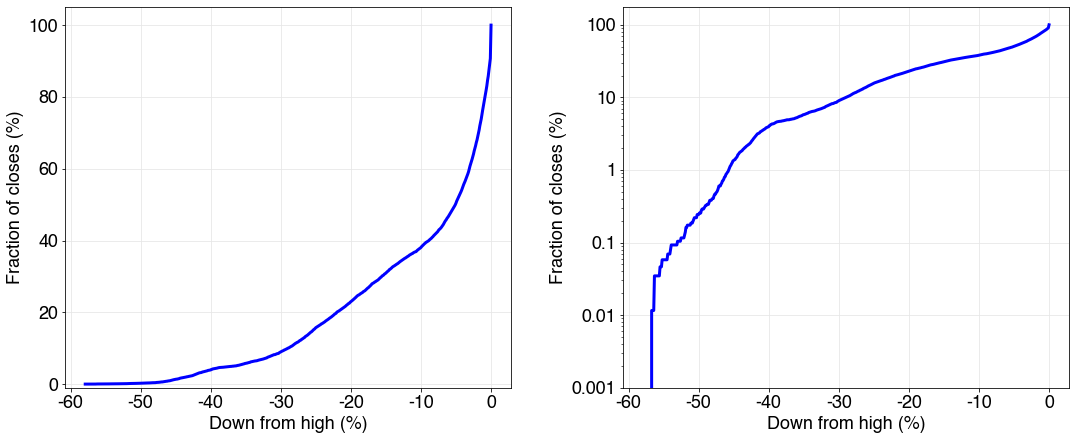

In [66]:
# plot line of close fraction vs. off %

### PLOT S&P 500 data

# linear scale
fig, axes = plt.subplots(1, 2, figsize = (18,7))
x = fract_pct_off['percent off']
y = fract_pct_off['fraction of days']
axes[0].plot(x, y, 'blue', linewidth=3)
axes[0].set_xlabel('Down from high (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylabel('Fraction of closes (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylim(-1,105)

# log scale
from matplotlib.ticker import FormatStrFormatter
axes[1].plot(x, y, 'blue', linewidth=3)
axes[1].set_xlabel('Down from high (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylabel('Fraction of closes (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_yscale('log')
axes[1].set_ylim(0.001,175)
axes[1].set_yticklabels(['', '0.001', '0.01', '0.1', '1', '10', '100'])

# set axis tick label properties
plt.setp(axes[0].get_xticklabels(), rotation=0, fontsize=18, fontname = 'Helvetica')
plt.setp(axes[1].get_xticklabels(), rotation=0, fontsize=18, fontname = 'Helvetica')
plt.setp(axes[0].get_yticklabels(), fontsize=18, fontname = 'Helvetica')
plt.setp(axes[1].get_yticklabels(), fontsize=18, fontname = 'Helvetica')

# turn grid on
axes[0].grid(color=(.9, .9, .9))
axes[1].grid(color=(.9, .9, .9))

figure_name = './images/fraction_closes_down.png'

plt.savefig(figure_name, dpi = 250)
plt.subplots_adjust(wspace=0.25)
plt.show()

In [74]:
# print table showing fraction of closes below x% of record high

fract_pct_off = pd.DataFrame(columns=['percent off', 'fraction of days (%)'])
for i in np.arange(0,60,5):
    pct_off = i
    fract_pct_off_temp = pd.DataFrame({'percent off': -i, 
                                      'fraction of days (%)': round(100*len(sp_diffs[sp_diffs['off from high'] <= -pct_off]) / len(sp_diffs), 2)}, index=[0])
    
    fract_pct_off = fract_pct_off.append(fract_pct_off_temp, ignore_index=True)
    
fract_pct_off = fract_pct_off[::-1].reset_index().iloc[:,1:]
fract_pct_off.style.hide_index()

percent off,fraction of days (%)
-55,0.06
-50,0.24
-45,1.35
-40,3.95
-35,5.78
-30,8.98
-25,15.72
-20,22.95
-15,30.94
-10,38.06


## Calculate return for various strategies

In [135]:
# define function to calculate price paid, shares purchased, avg share price, roi for given buy dates
def calc_return(dip, buy_dates):
    
    # sum up share prices to get price paid
    paid = int(buy_dates['close'].sum())
    
    # sum up number of shares bought to get average share price
    shares = len(buy_dates)
    avg_share_price = round(paid/shares, 2)
    
    # take current (last available) price as market value per share
    current_price = sp_diffs['close'].iloc[-1]
    
    # calculate total ROI and annualized ROI
    roi = 100*round((current_price - avg_share_price) / avg_share_price, 3)
    roi_annual = round(roi / (sp_diffs['date'].iloc[-1].year - sp_diffs['date'].iloc[0].year), 2)
    
    # create dataframe summarizing results
    out = pd.DataFrame({'dip': dip,
                        'paid': paid, 
                        'shares': shares, 
                        'avg share price': avg_share_price, 
                        'current price': current_price, 
                        'ROI': roi, 
                        'ROI/y': roi_annual}, index=[0])
    
    return out

In [112]:
# baseline: buy every day
calc_return(sp_diffs)

,paid,shares,avg share price,current price,ROI,ROI/y
0,10064328,8639,1164.99,2789.82,139.5,4.1


In [128]:
# buy when discount exceeds n%
n = 15
discount_n = sp_diffs[sp_diffs['off from high'] < -n]
calc_return(discount_n)

,paid,shares,avg share price,current price,ROI,ROI/y
0,2715804,2673,1016.01,2789.82,174.6,5.14


In [145]:
# buy when discount exceeds n%
return_table = pd.DataFrame(columns=['dip', 'paid', 'shares', 'avg share price', 'current price', 'ROI', 'ROI/y'])
for i in np.arange(0, 56, 0.1):
    discount_n = sp_diffs[sp_diffs['off from high'] <= -i]
    return_temp = calc_return(i, discount_n)
    return_table = return_table.append(return_temp)

In [146]:
# format, save return vs. dip buy table
return_vs_dip_buy = return_table.round({'dip': 1, 'ROI': 1})
return_vs_dip_buy.to_csv('./data/return_vs_dip_buy.csv', index=False)

In [130]:
# buy at all-time highs
discount_zero = sp_diffs[sp_diffs['off from high'] == 0]
calc_return(discount_zero)

,paid,shares,avg share price,current price,ROI,ROI/y
0,882848,671,1315.72,2789.82,112.0,3.29


In [147]:
# plot return vs. dip buy
return_vs_dip_buy

,dip,paid,shares,avg share price,current price,ROI,ROI/y
0,0.0,10064328,8639,1164.99,2789.82,139.5,4.10
0,0.1,8981467,7837,1146.03,2789.82,143.4,4.22
0,0.2,8768600,7684,1141.15,2789.82,144.5,4.25
0,0.3,8572727,7557,1134.41,2789.82,145.9,4.29
0,0.4,8359546,7413,1127.69,2789.82,147.4,4.34
...,...,...,...,...,...,...,...
0,55.5,2738,4,684.50,2789.82,307.6,9.05
0,55.6,2042,3,680.67,2789.82,309.9,9.11
0,55.7,2042,3,680.67,2789.82,309.9,9.11
0,55.8,2042,3,680.67,2789.82,309.9,9.11


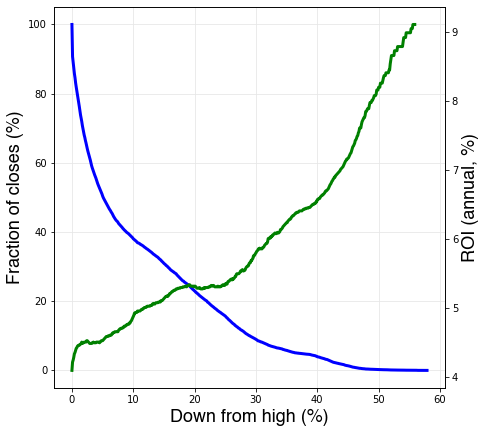

In [164]:
# plot line of return vs. dip buy

### PLOT S&P 500 data
fig, ax = plt.subplots(1, 1, figsize = (7,7))
ax2 = ax.twinx()

# buy opportunities
x = fract_pct_off['percent off']
y = fract_pct_off['fraction of days']
ax.plot(-x, y, 'blue', linewidth=3)
ax.set_xlabel('Down from high (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
ax.set_ylabel('Fraction of closes (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
# axes[0].set_ylim(-1,105)

# returns
x2 = return_vs_dip_buy['dip']
y2 = return_vs_dip_buy['ROI/y']
ax2.plot(x1, y1, 'green', linewidth=3)
ax2.set_xlabel('Buy when below (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
ax2.set_ylabel('ROI (annual, %)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
# axes[0].set_ylim(-1,105)


# set axis tick label properties
plt.setp(axes[0].get_xticklabels(), rotation=0, fontsize=18, fontname = 'Helvetica')
# plt.setp(axes[1].get_xticklabels(), rotation=0, fontsize=18, fontname = 'Helvetica')
plt.setp(axes[0].get_yticklabels(), fontsize=18, fontname = 'Helvetica')
# plt.setp(axes[1].get_yticklabels(), fontsize=18, fontname = 'Helvetica')

# turn grid on
ax.grid(color=(.9, .9, .9))
# ax2.grid(color=(.975, .975, .975))

# figure_name = './images/roi_vs_dip_buy.png'

plt.savefig(figure_name, dpi = 250)
plt.subplots_adjust(wspace=0.25)
plt.show()

In [17]:
# find local extrema, create dataframes storing them
from scipy.signal import argrelextrema

order = 100
min_indices = argrelextrema(sp_diffs['close'].values, np.less_equal, order=order)[0]
max_indices = argrelextrema(sp_diffs['close'].values, np.greater_equal, order=order)[0]

min_dates = sp_diffs.iloc[min_indices]['date']
max_dates = sp_diffs.iloc[max_indices]['date']

mins = pd.DataFrame({'date': min_dates,
                     'close': sp_diffs['close'][min_indices]})

maxs = pd.DataFrame({'date': max_dates,
                     'close': sp_diffs['close'][max_indices]})

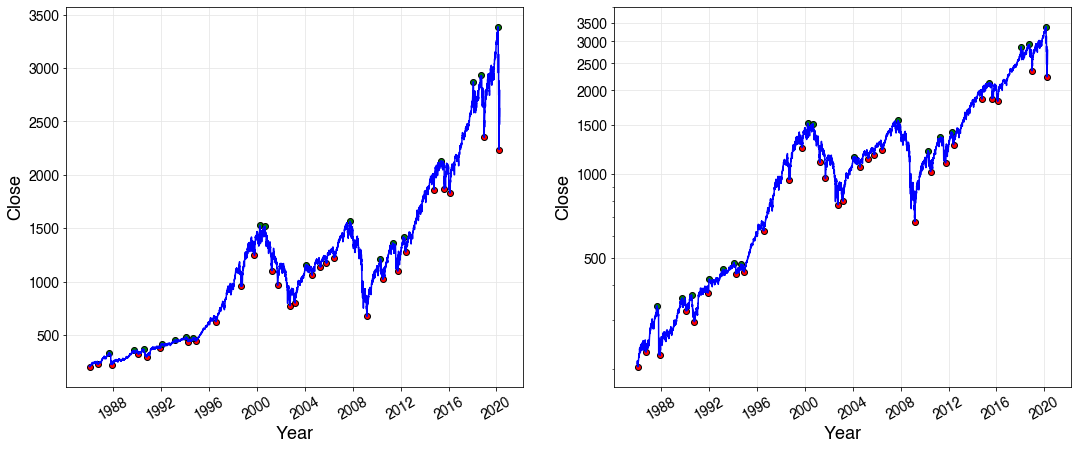

In [24]:
### PLOT S&P 500 data with local extrema labeled

# linear scale
fig, axes = plt.subplots(1, 2, figsize = (18,7))
x = sp['date']
y = sp['close']
axes[0].plot(x, y, 'blue')
axes[0].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# log scale
import matplotlib
axes[1].plot(x, y, 'blue')
axes[1].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_yscale('log')
axes[1].set_yticks(np.arange(500,3501,500))
axes[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


# add labeled extrema
axes[0].scatter(mins['date'], mins['close'], c='r', edgecolor='k')
axes[0].scatter(maxs['date'], maxs['close'], c='g', edgecolor='k')
axes[1].scatter(mins['date'], mins['close'], c='r', edgecolor='k')
axes[1].scatter(maxs['date'], maxs['close'], c='g', edgecolor='k')

# set axis tick label properties
plt.setp(axes[0].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[0].get_yticklabels(), fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_yticklabels(), fontsize=14, fontname = 'Helvetica')

# turn grid on
axes[0].grid(color=(.9, .9, .9)); axes[0].set_axisbelow(True)
axes[1].grid(color=(.9, .9, .9)); axes[1].set_axisbelow(True)

figure_name = './images/sp_lin_log_extrema.png'

plt.savefig(figure_name, dpi = 250)

plt.show()

In [19]:
sp_diffs

,date,close,daily change,daily change pct,high to date,off from high
0,1986-01-02,209.59,NaN,NaN,209.59,0.000
1,1986-01-03,210.88,1.29,0.612,210.88,0.000
2,1986-01-06,210.65,-0.23,-0.109,210.88,-0.109
3,1986-01-07,213.80,3.15,1.473,213.80,0.000
4,1986-01-08,207.97,-5.83,-2.803,213.80,-2.727
...,...,...,...,...,...,...
8634,2020-04-03,2488.65,-38.25,-1.537,3386.15,-26.505
8635,2020-04-06,2663.68,175.03,6.571,3386.15,-21.336
8636,2020-04-07,2659.41,-4.27,-0.161,3386.15,-21.462
8637,2020-04-08,2749.98,90.57,3.293,3386.15,-18.787


In [20]:
# find all dates where current price is x% ('drop') less than a past price within given period of time ('window')
num = 10000
drop = 0.40
window = 50

# loop over all closing prices
drops = pd.DataFrame(columns = ['start date', 'start price', 'end date', 'end price', 'drop pct'])
                               
for counter_i, close in enumerate(sp_diffs['close'][:num]):
    
    # print status - year when searching early Jan
    if sp_diffs['date'].iloc[counter_i].date().month == 1 and sp_diffs['date'].iloc[counter_i].date().day < 4:
        print('***' + str(sp_diffs['date'].iloc[counter_i].date().year) + '***')
    
    # loop over all prices after this
    for counter_j, close in enumerate(sp_diffs['close'][:num]):
        
        # print dates within time window of peak x% higher
        if counter_j > counter_i and counter_j < window + counter_i and sp_diffs['close'].iloc[counter_i] > (1 + drop)*sp_diffs['close'].iloc[counter_j]:
                        
            # pull out important values
            start_date = sp_diffs['date'].iloc[counter_i].date()
            start_price = sp_diffs['close'].iloc[counter_i]
            end_date = sp_diffs['date'].iloc[counter_j].date()
            end_price = sp_diffs['close'].iloc[counter_j]
            drop_pct = round(100*(sp_diffs['close'].iloc[counter_i]/sp_diffs['close'].iloc[counter_j]-1),2)
            
#             # print them 
#             print(start_date, start_price, end_date, end_price, drop_pct)
            
            # create temporary dataframe
            drops_temp = pd.DataFrame({'start date': sp_diffs['date'].iloc[counter_i].date(),
                                        'start price': sp_diffs['close'].iloc[counter_i],
                                        'end date': sp_diffs['date'].iloc[counter_j].date(),
                                        'end price': sp_diffs['close'].iloc[counter_j],
                                        'drop pct': round(100*(sp_diffs['close'].iloc[counter_i]/sp_diffs['close'].iloc[counter_j]-1),2)}, index=[0])
            
            
            # add entry to growing dataframe, provided start and end dates are not already in there
            if start_date not in [item for item in drops['start date']] and end_date not in [item for item in drops['end date']]:
                drops = drops.append(drops_temp, ignore_index=True)

***1986***
***1986***
***1987***
***1989***
***1990***
***1990***
***1991***
***1991***
***1992***
***1992***
***1994***
***1995***
***1996***
***1996***
***1997***
***1997***
***1998***
***2000***
***2001***
***2001***
***2002***
***2002***
***2003***
***2003***
***2004***
***2005***
***2006***
***2007***
***2008***
***2008***
***2009***
***2011***
***2012***
***2013***
***2013***
***2014***
***2014***
***2015***
***2017***
***2018***
***2018***
***2019***
***2019***
***2020***
***2020***


In [21]:
drops

,start date,start price,end date,end price,drop pct
0,1987-08-10,328.00,1987-10-19,224.84,45.88
1,1987-08-11,333.33,1987-10-20,236.83,40.75
2,1987-08-17,334.11,1987-10-26,227.67,46.75
3,1987-08-18,329.25,1987-10-27,233.19,41.19
4,1987-08-19,329.83,1987-10-28,233.28,41.39
5,1987-09-24,319.72,1987-12-03,225.21,41.97
6,1987-09-25,320.16,1987-12-04,223.92,42.98
7,1987-09-28,323.20,1987-11-30,230.30,40.34
8,1987-09-29,321.69,1987-12-07,228.76,40.62
9,1987-10-01,327.33,1987-12-01,232.00,41.09
